In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
import matplotlib as mpl
import scipy.stats

In [2]:
from matplotlib import rc
%matplotlib inline

In [3]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## 아파트, 어떻게 투자해야 하는가?

#### 분석 개요
- 아파트 가격에 대한 최근 수년간의 상승세, 시세 등을 확인
- 규모별, 지역별 비교 대조
- 아파트를 사야하는 것인가? 아파트 매매를 한다면 어느 타입을 어느 지역에서 구매해야 하는 것인가?

#### 분석 자료
- 자료1: 최근 4개년 전국 아파트 분양가격 동향(주택도시보증공사)
- 자료2: 최근 4개년 공동주택 매매 실거래가격지수 현황(한국감정원)
- 자료3: 최근 3개년 전국 아파트 면적당 평균가격(KB 부동산)

#### 제한 사항
- 분석 대상이 지역 내의 편차를 고려하지 않은 일괄적인 평균 추정치이므로, 전체적인 시장의 분위기를 판단하는 용도에 국한
- 지수 관련 자료와 시세 관련 자료의 시점이 일치하지 않음
    - 지수 관련(최근 4개년), 시세 관련(최근 3개년)
- 자료 3의 내용은 규모를 고려하지 않음

### 가설 1. 분양가격과 실제 아파트의 가격은 깊은 관계가 있을 것이다.
### 가설 2. 구매하려면 지방보다는 서울이 나을 것이다.
### 가설 3. 구매하려면 대형보다는 소형이 나을 것이다.
### 가설 4. 아파트는 아직 타 투자수단 대비 매력적일 것이다.

#### 전처리 과정

- 가설 증명을 위해 자료 1과 자료 2를 비교하는 과정에서 규모 분류, 기준 수치, 측정 년도 등이 상이함을 확인
- 일방의 기준에 맞추어, 아래와 같이 변환함 
    - 자료 1, 2의 수치를 '2017년 11월' 기준가격을 100으로 하는 상대가격 지수로 변환
    - 자료 1, 2의 분류 단위를
        - 소형(전용면적 ~60m2)
        - 중소형(전용면적 60~85m2)
        - 중대형(전용면적 85~102m2)
        - 대형(전용면적 102m2~)으로 분류
    - 자료 1, 2의 지역을 서울, 수도권, 지방(그 외) 으로 분류

In [1]:
# 1-1. 분양가 지수 데이터(자료 1) 임포트

In [5]:
df_init = pd.read_csv("transposed/quotient_init_t.csv", encoding = "utf-8")

In [6]:
df_init.set_index('timeline', inplace=True)
df_init

,Nationwide_s,Nationwide_sm,Nationwide_ml,Nationwide_l,Metro_s,Metro_sm,Metro_ml,Metro_l,Region_s,Region_sm,Region_ml,Region_l,Seoul_s,Seoul_sm,Seoul_ml,Seoul_l
timeline,,,,,,,,,,,,,,,,
15-10,83.4,88.2,84.8,87.3,94.30,93.05,99.40,80.95,85.3,87.0,89.5,93.2,81.5,99.7,78.3,85.5
15-11,84.5,88.7,86.3,90.1,91.25,92.55,97.95,81.50,85.5,87.3,88.2,94.6,91.2,101.1,97.0,95.2
15-12,86.9,89.6,86.0,90.2,94.15,94.15,98.75,83.05,87.7,88.2,89.3,94.4,91.2,101.1,89.1,95.2
16-01,87.2,90.3,86.0,89.9,94.15,94.00,98.75,83.05,87.9,88.8,89.3,94.0,92.7,102.3,89.1,95.2
16-02,87.5,90.2,87.5,89.4,94.15,93.40,97.80,80.80,88.3,89.0,89.4,94.1,92.9,102.4,89.1,93.9
16-03,87.5,90.5,90.1,90.2,96.10,93.25,97.55,80.95,87.4,88.9,89.8,88.2,94.5,103.9,98.2,92.6
16-04,87.9,91.7,92.1,93.2,95.55,93.55,98.00,94.90,87.6,89.9,90.2,94.9,95.5,105.0,110.7,92.3
16-05,88.6,92.0,91.4,92.3,99.80,96.40,95.05,92.45,87.9,89.9,90.8,94.5,95.8,105.2,105.7,92.3
16-06,88.3,93.3,93.1,92.3,95.50,100.85,95.80,87.55,88.3,90.9,92.3,95.7,94.7,105.4,105.8,92.5


In [16]:
# 1-2. 사이즈별로 데이터프레임 분리

df_small_init = pd.DataFrame([df_init['Nationwide_s'], df_init['Metro_s'], df_init['Region_s'], df_init['Seoul_s']])
df_smd_init = pd.DataFrame([df_init['Nationwide_sm'], df_init['Metro_sm'], df_init['Region_sm'], df_init['Seoul_sm']])
df_midl_init = pd.DataFrame([df_init['Nationwide_ml'], df_init['Metro_ml'], df_init['Region_ml'], df_init['Seoul_ml']])
df_large_init = pd.DataFrame([df_init['Nationwide_l'], df_init['Metro_l'], df_init['Region_l'], df_init['Seoul_l']])

df_small_init, df_smd_init, df_midl_init, df_large_init = df_small_init.T, df_smd_init.T, df_midl_init.T, df_large_init.T

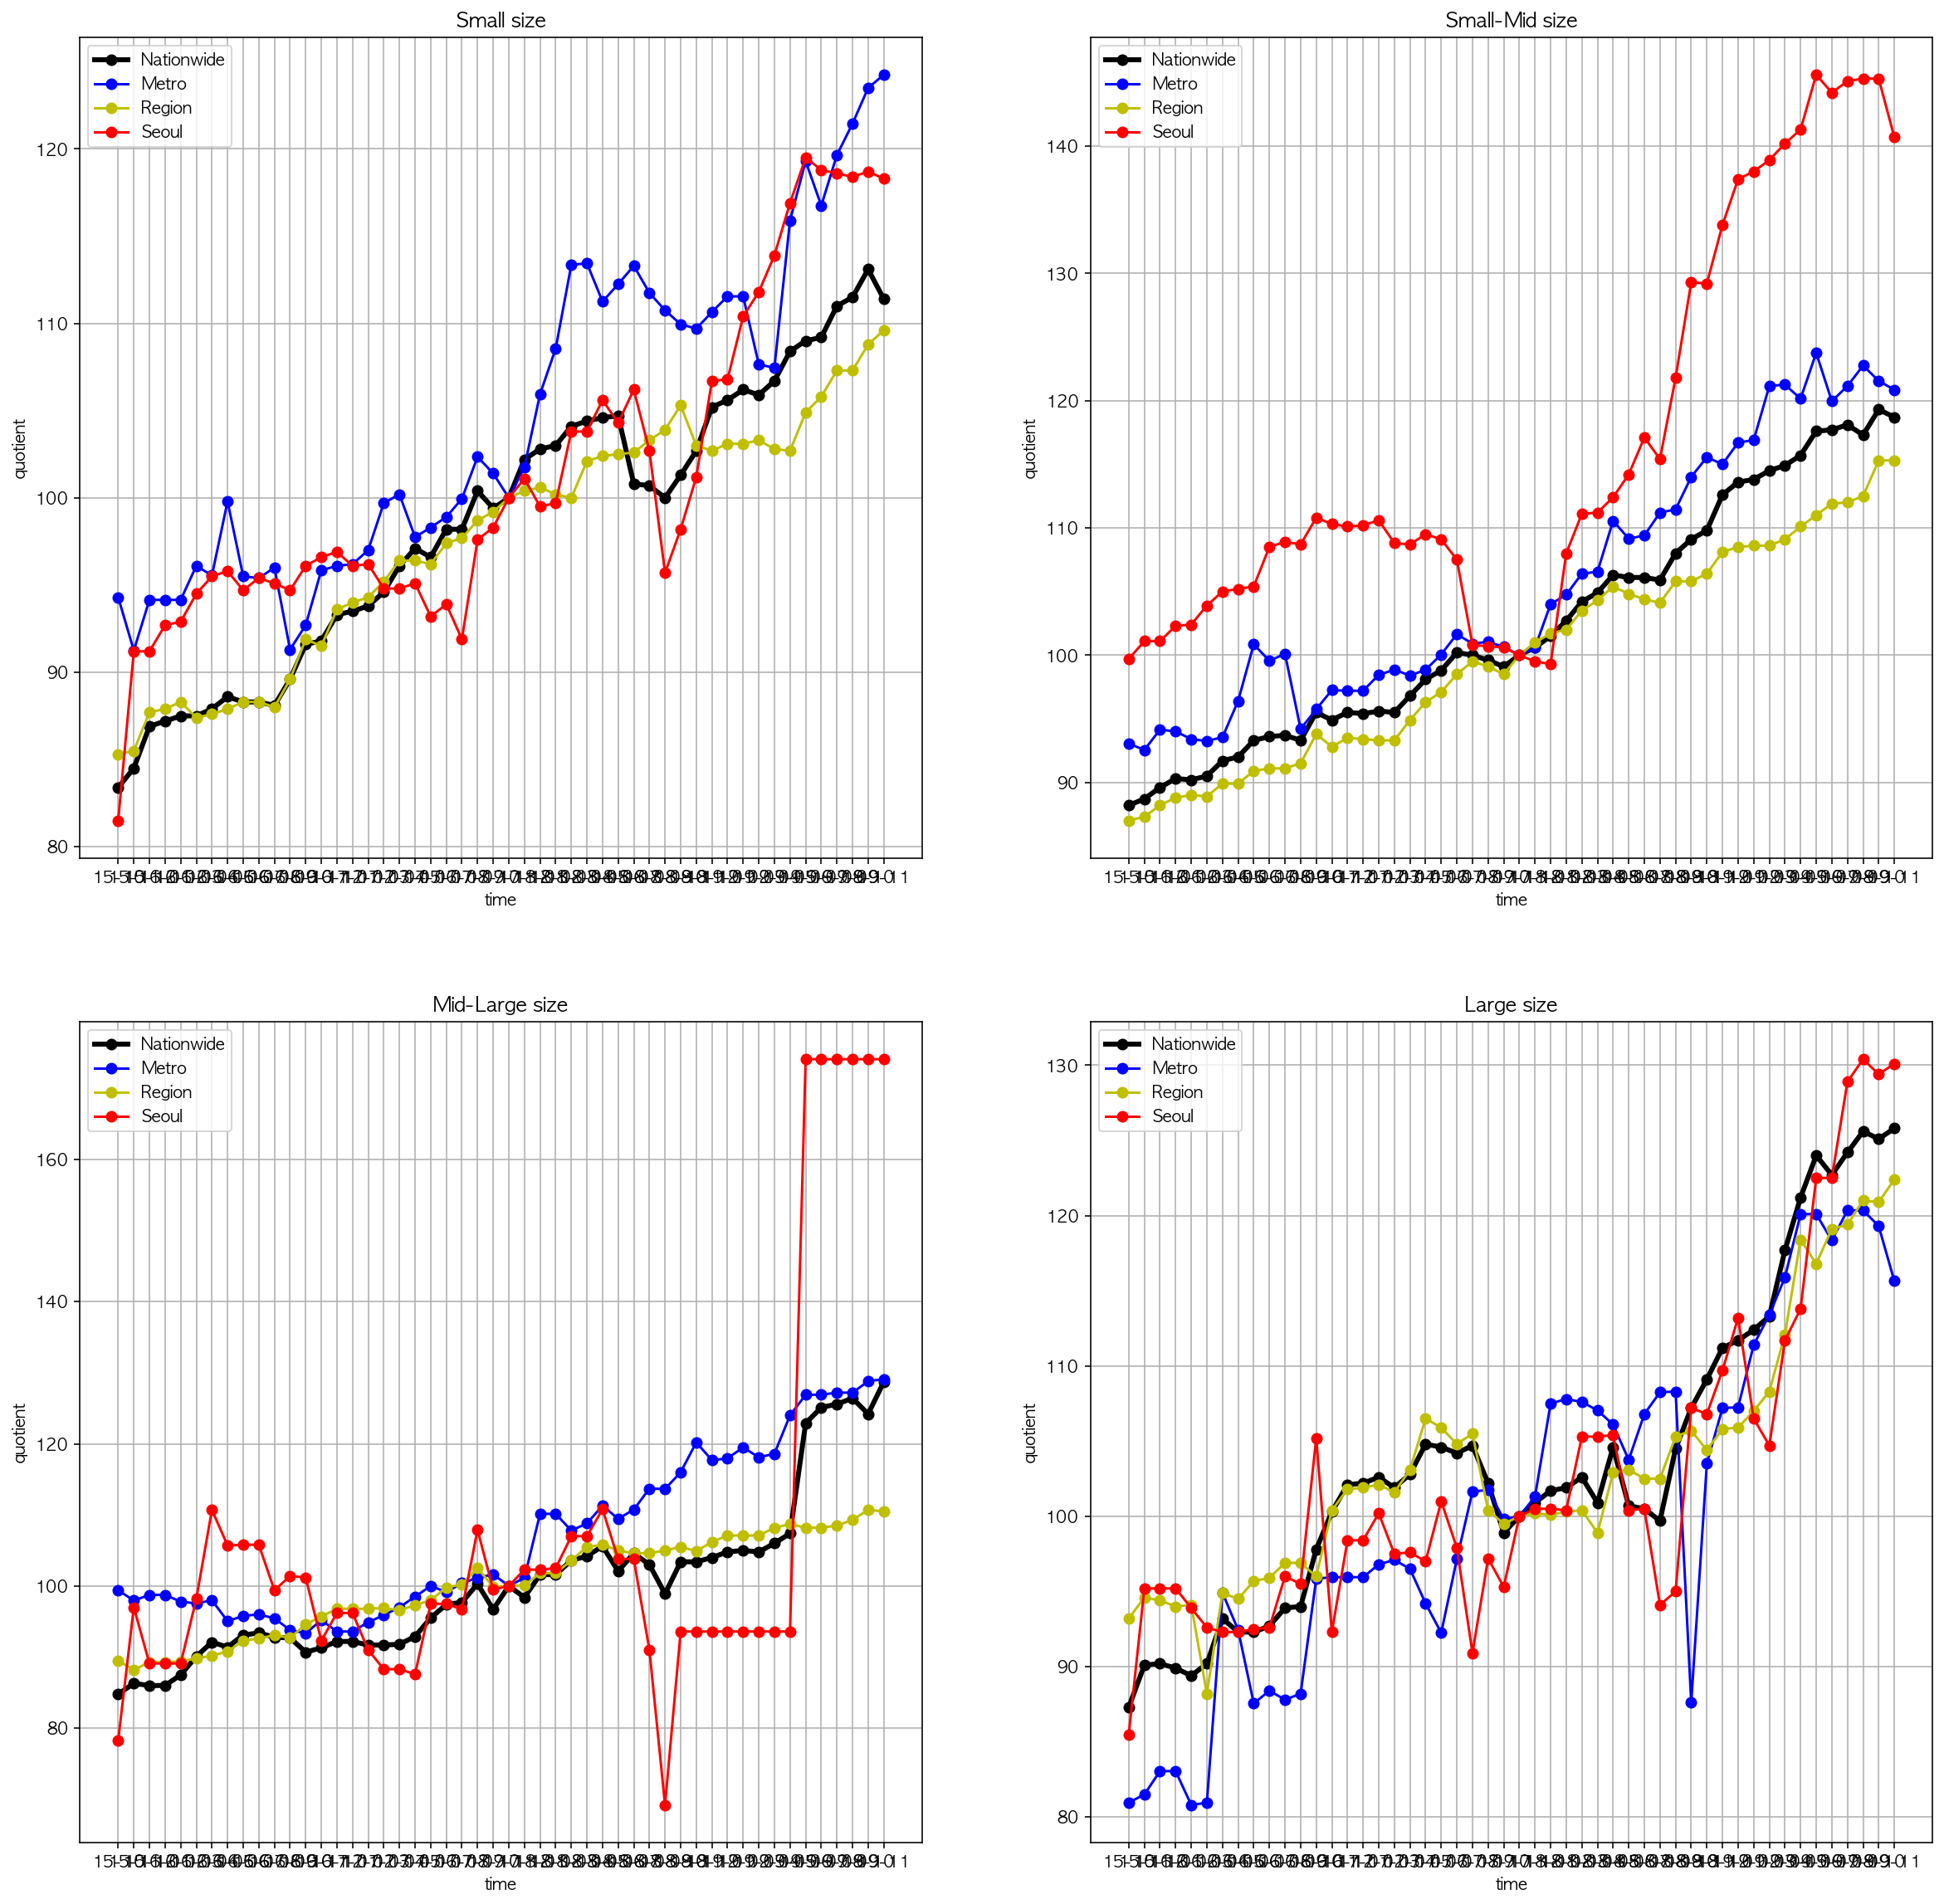

In [17]:
plt.figure(figsize=(20, 20))

plt.subplot(221)

plt.plot(df_small_init['Nationwide_s'], marker='o', c='k', linewidth=3, label='Nationwide')
plt.plot(df_small_init['Metro_s'], marker='o', c='b', label='Metro')
plt.plot(df_small_init['Region_s'], marker='o',c='y', label='Region')
plt.plot(df_small_init['Seoul_s'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.grid()
plt.title('Small size')
plt.legend()


plt.subplot(222)

plt.plot(df_smd_init['Nationwide_sm'], marker='o', c='k', linewidth=3, label='Nationwide')
plt.plot(df_smd_init['Metro_sm'], marker='o', c='b', label='Metro')
plt.plot(df_smd_init['Region_sm'], marker='o',c='y', label='Region')
plt.plot(df_smd_init['Seoul_sm'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.grid()
plt.title('Small-Mid size')
plt.legend()


plt.subplot(223)

plt.plot(df_midl_init['Nationwide_ml'], marker='o', c='k', linewidth=3, label='Nationwide')
plt.plot(df_midl_init['Metro_ml'], marker='o', c='b', label='Metro')
plt.plot(df_midl_init['Region_ml'], marker='o',c='y', label='Region')
plt.plot(df_midl_init['Seoul_ml'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.grid()
plt.title('Mid-Large size')
plt.legend()


plt.subplot(224)

plt.plot(df_large_init['Nationwide_l'], marker='o', c='k', linewidth=3, label='Nationwide')
plt.plot(df_large_init['Metro_l'], marker='o', c='b', label='Metro')
plt.plot(df_large_init['Region_l'], marker='o',c='y', label='Region')
plt.plot(df_large_init['Seoul_l'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.grid()
plt.title('Large size')
plt.legend()

plt.show()

#### 분석 결과

- 기준: 2017년 10월
- 분류: 소형, 중소형, 중대형, 대형
    
    - 소형
        - 전국, 서울: 상승을 보이다가 주춤하는 모습
        - 수도권, 지방은 꾸준한 상승세를 보임
        
    - 중소형
        - 서울이 독보적으로 높은 모습을 보임
        - 전체적으로 하락하는 분위기
        
    - 중대형
        - 서울: 2018년 9월 부동산 대책 발표로 하락, 
        - 2018년 10월 ~ 2019년 5월까지 분양에 대해 동일한 지수를 보임
        - 2019년 6월 이후 대폭 상승
        
    - 대형
        - 수도권 18년 10월 하락 이후 상승, 등락폭이 가장 큼

#### 특이사항
- 서울 지역의 중소형 분양가 내용 중 
    - 18년 10월~ 19년 5월 사이의 지수 변동이 없음은 그 기간에 해당 면적의 아파트가 공급되지 않았음을 의미 
    - 19년 6월의 급격한 지수 증가는 공급 물량이 많지 않은 상황에서 상대 시세가 높은 지역의 물량이 공급되어 편향된 평균이 도출되었음

In [20]:
# 1-3. (규모 불문)지역별 지수 상승세 비교

nw_init_mean = (df_init['Nationwide_s'] + df_init['Nationwide_sm'] + df_init['Nationwide_ml'] + df_init['Nationwide_l']) / 4
me_init_mean = (df_init['Metro_s'] + df_init['Metro_sm'] + df_init['Metro_ml'] + df_init['Metro_l']) / 4
re_init_mean = (df_init['Region_s'] + df_init['Region_sm'] + df_init['Region_ml'] + df_init['Region_l']) / 4
se_init_mean = (df_init['Seoul_s'] + df_init['Seoul_sm'] + df_init['Seoul_ml'] + df_init['Seoul_l']) / 4

df_init_mean = pd.DataFrame([nw_init_mean, me_init_mean, re_init_mean, se_init_mean])

df_init_mean = df_init_mean.T
df_init_mean.columns = ['nationwide', 'metro', 'region', 'seoul']

In [21]:
df_init_mean

,nationwide,metro,region,seoul
timeline,,,,
15-10,85.925,91.9250,88.750,86.250
15-11,87.400,90.8125,88.900,96.125
15-12,88.175,92.5250,89.900,94.150
16-01,88.350,92.4875,90.000,94.825
16-02,88.650,91.5375,90.200,94.575
16-03,89.575,91.9625,88.575,97.300
16-04,91.225,95.5000,90.650,100.875
16-05,91.075,95.9250,90.775,99.750
16-06,91.750,94.9250,91.800,99.600


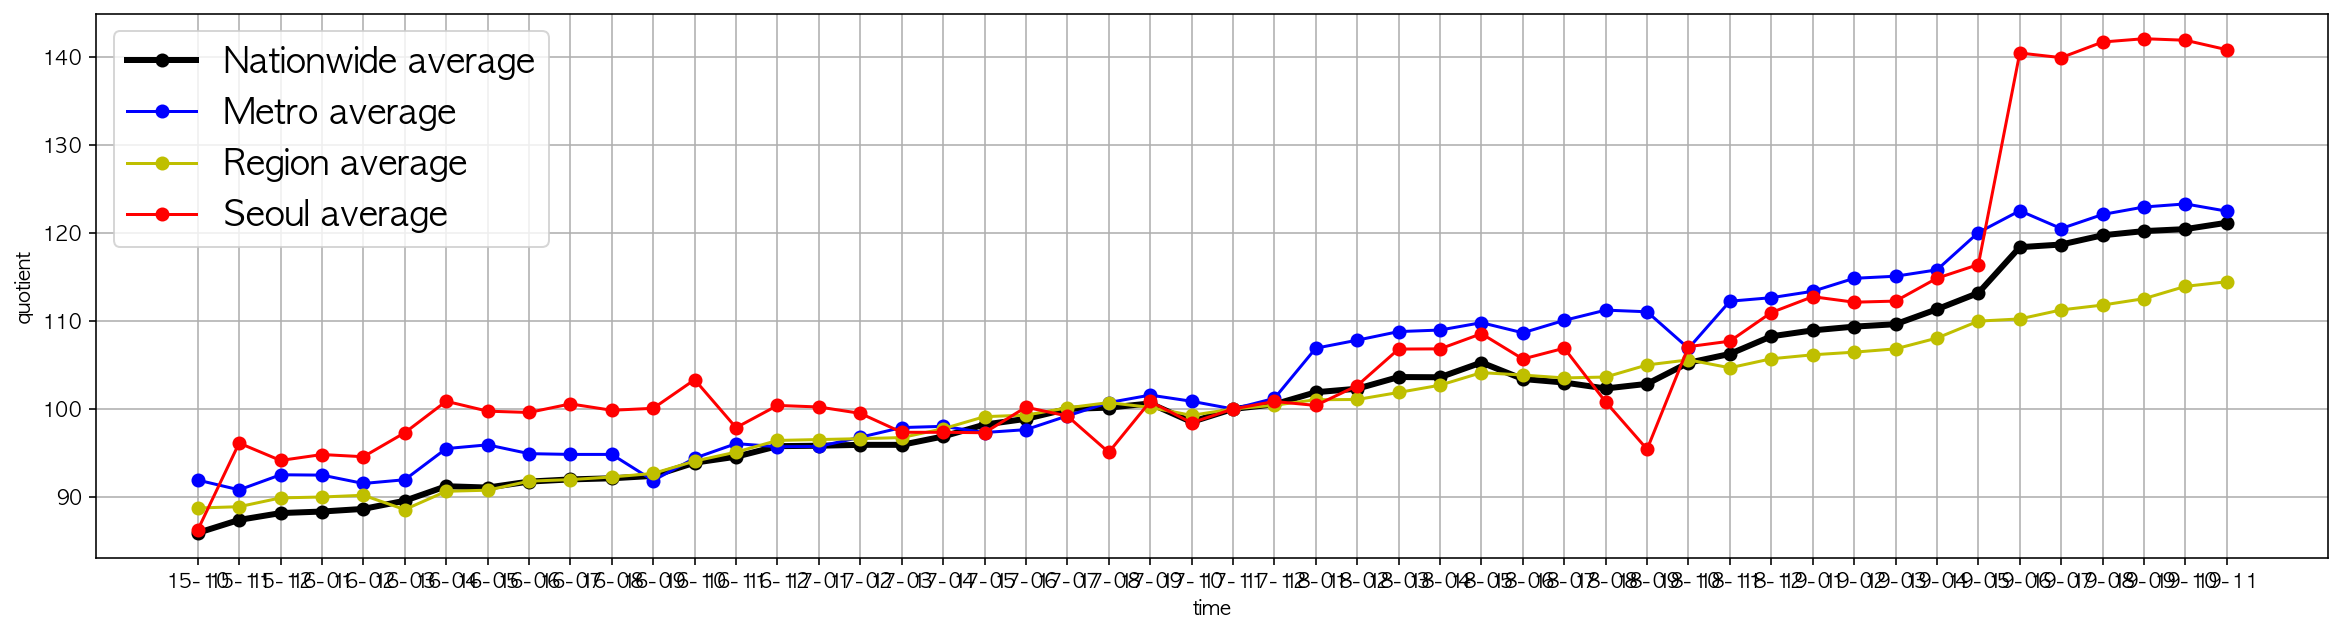

In [86]:
plt.figure(figsize=(20, 5))
plt.plot(df_init_mean['nationwide'], marker='o', c='k', linewidth=3, label='Nationwide average')
plt.plot(df_init_mean['metro'], marker='o', c='b', label='Metro average')
plt.plot(df_init_mean['region'], marker='o',c='y', label='Region average')
plt.plot(df_init_mean['seoul'], marker='o', c='r', label='Seoul average')
plt.xlabel('time')
plt.ylabel('quotient')
plt.grid()

plt.legend(loc=0, fontsize='xx-large')

plt.show()

#### 분석 결과

- 부동산 대책이 발표된 18년 9월 서울의 지수가 하락하였다가 다시 회복
- 정부정책에 서울이 가장 민감하게 반응

#### 특이사항

- 앞선 특이사항(서울 지역 중소형 분양가)으로 인해 서울 지역의 평균 분양가가 19년 6월을 기점으로 편향된 추세를 보임
- 동 요소를 배제할 경우, 서울 지역 분양가의 추세는 수도권 지역의 분양가 추세와 유사한 모양을 보일 것으로 추정

In [2]:
# 2-1. 거래가 지수 데이터(자료 2) 임포트

In [24]:
df_real = pd.read_csv("transposed/quotient_real_t.csv", encoding = "utf-8")

In [25]:
df_real.set_index('timeline', inplace=True)
df_real

,Nationwide_s,Nationwide_sm,Nationwide_ml,Nationwide_l,Metro_s,Metro_sm,Metro_ml,Metro_l,Region_s,Region_sm,Region_ml,Region_l,Seoul_s,Seoul_sm,Seoul_ml,Seoul_l
timeline,,,,,,,,,,,,,,,,
15-10,95.70,95.7,93.7,92.9,88.90,91.1,91.2,91.7,100.70,100.0,97.2,94.2,81.25,84.6,84.5,85.6
15-11,95.95,95.6,93.8,93.4,89.25,91.2,91.1,92.3,100.70,99.7,97.4,94.4,81.95,84.9,84.7,86.1
15-12,95.40,95.2,93.4,92.6,89.10,90.8,90.8,91.3,99.80,99.1,96.7,93.9,81.55,84.6,84.6,85.9
16-01,95.35,94.9,93.2,92.8,89.10,90.6,90.7,91.5,99.70,98.7,96.5,94.2,81.60,84.3,84.4,86.1
16-02,95.60,95.1,93.5,93.1,89.25,90.7,90.7,91.9,100.10,99.1,97.1,94.2,82.05,84.5,84.3,85.8
16-03,95.45,94.9,93.1,93.2,89.40,90.7,90.5,91.5,99.80,98.7,96.6,94.9,82.10,84.5,84.3,85.3
16-04,95.70,94.9,93.1,93.0,90.00,90.9,90.8,91.5,99.80,98.5,96.6,94.8,83.05,84.7,84.7,86.4
16-05,95.85,94.9,93.2,93.0,90.60,91.3,91.2,91.6,99.60,98.2,96.0,94.6,84.15,85.4,85.5,86.4
16-06,96.35,95.3,93.7,93.7,91.75,91.9,91.8,92.4,99.60,98.4,96.5,95.5,85.60,86.4,86.5,87.7


In [26]:
# 2-2. 사이즈별로 데이터프레임 분리

df_small_real = pd.DataFrame([df_real['Nationwide_s'], df_real['Metro_s'], df_real['Region_s'], df_real['Seoul_s']])
df_smd_real = pd.DataFrame([df_real['Nationwide_sm'], df_real['Metro_sm'], df_real['Region_sm'], df_real['Seoul_sm']])
df_midl_real = pd.DataFrame([df_real['Nationwide_ml'], df_real['Metro_ml'], df_real['Region_ml'], df_real['Seoul_ml']])
df_large_real = pd.DataFrame([df_real['Nationwide_l'], df_real['Metro_l'], df_real['Region_l'], df_real['Seoul_l']])

df_small_real, df_smd_real, df_midl_real, df_large_real = df_small_real.T, df_smd_real.T, df_midl_real.T, df_large_real.T

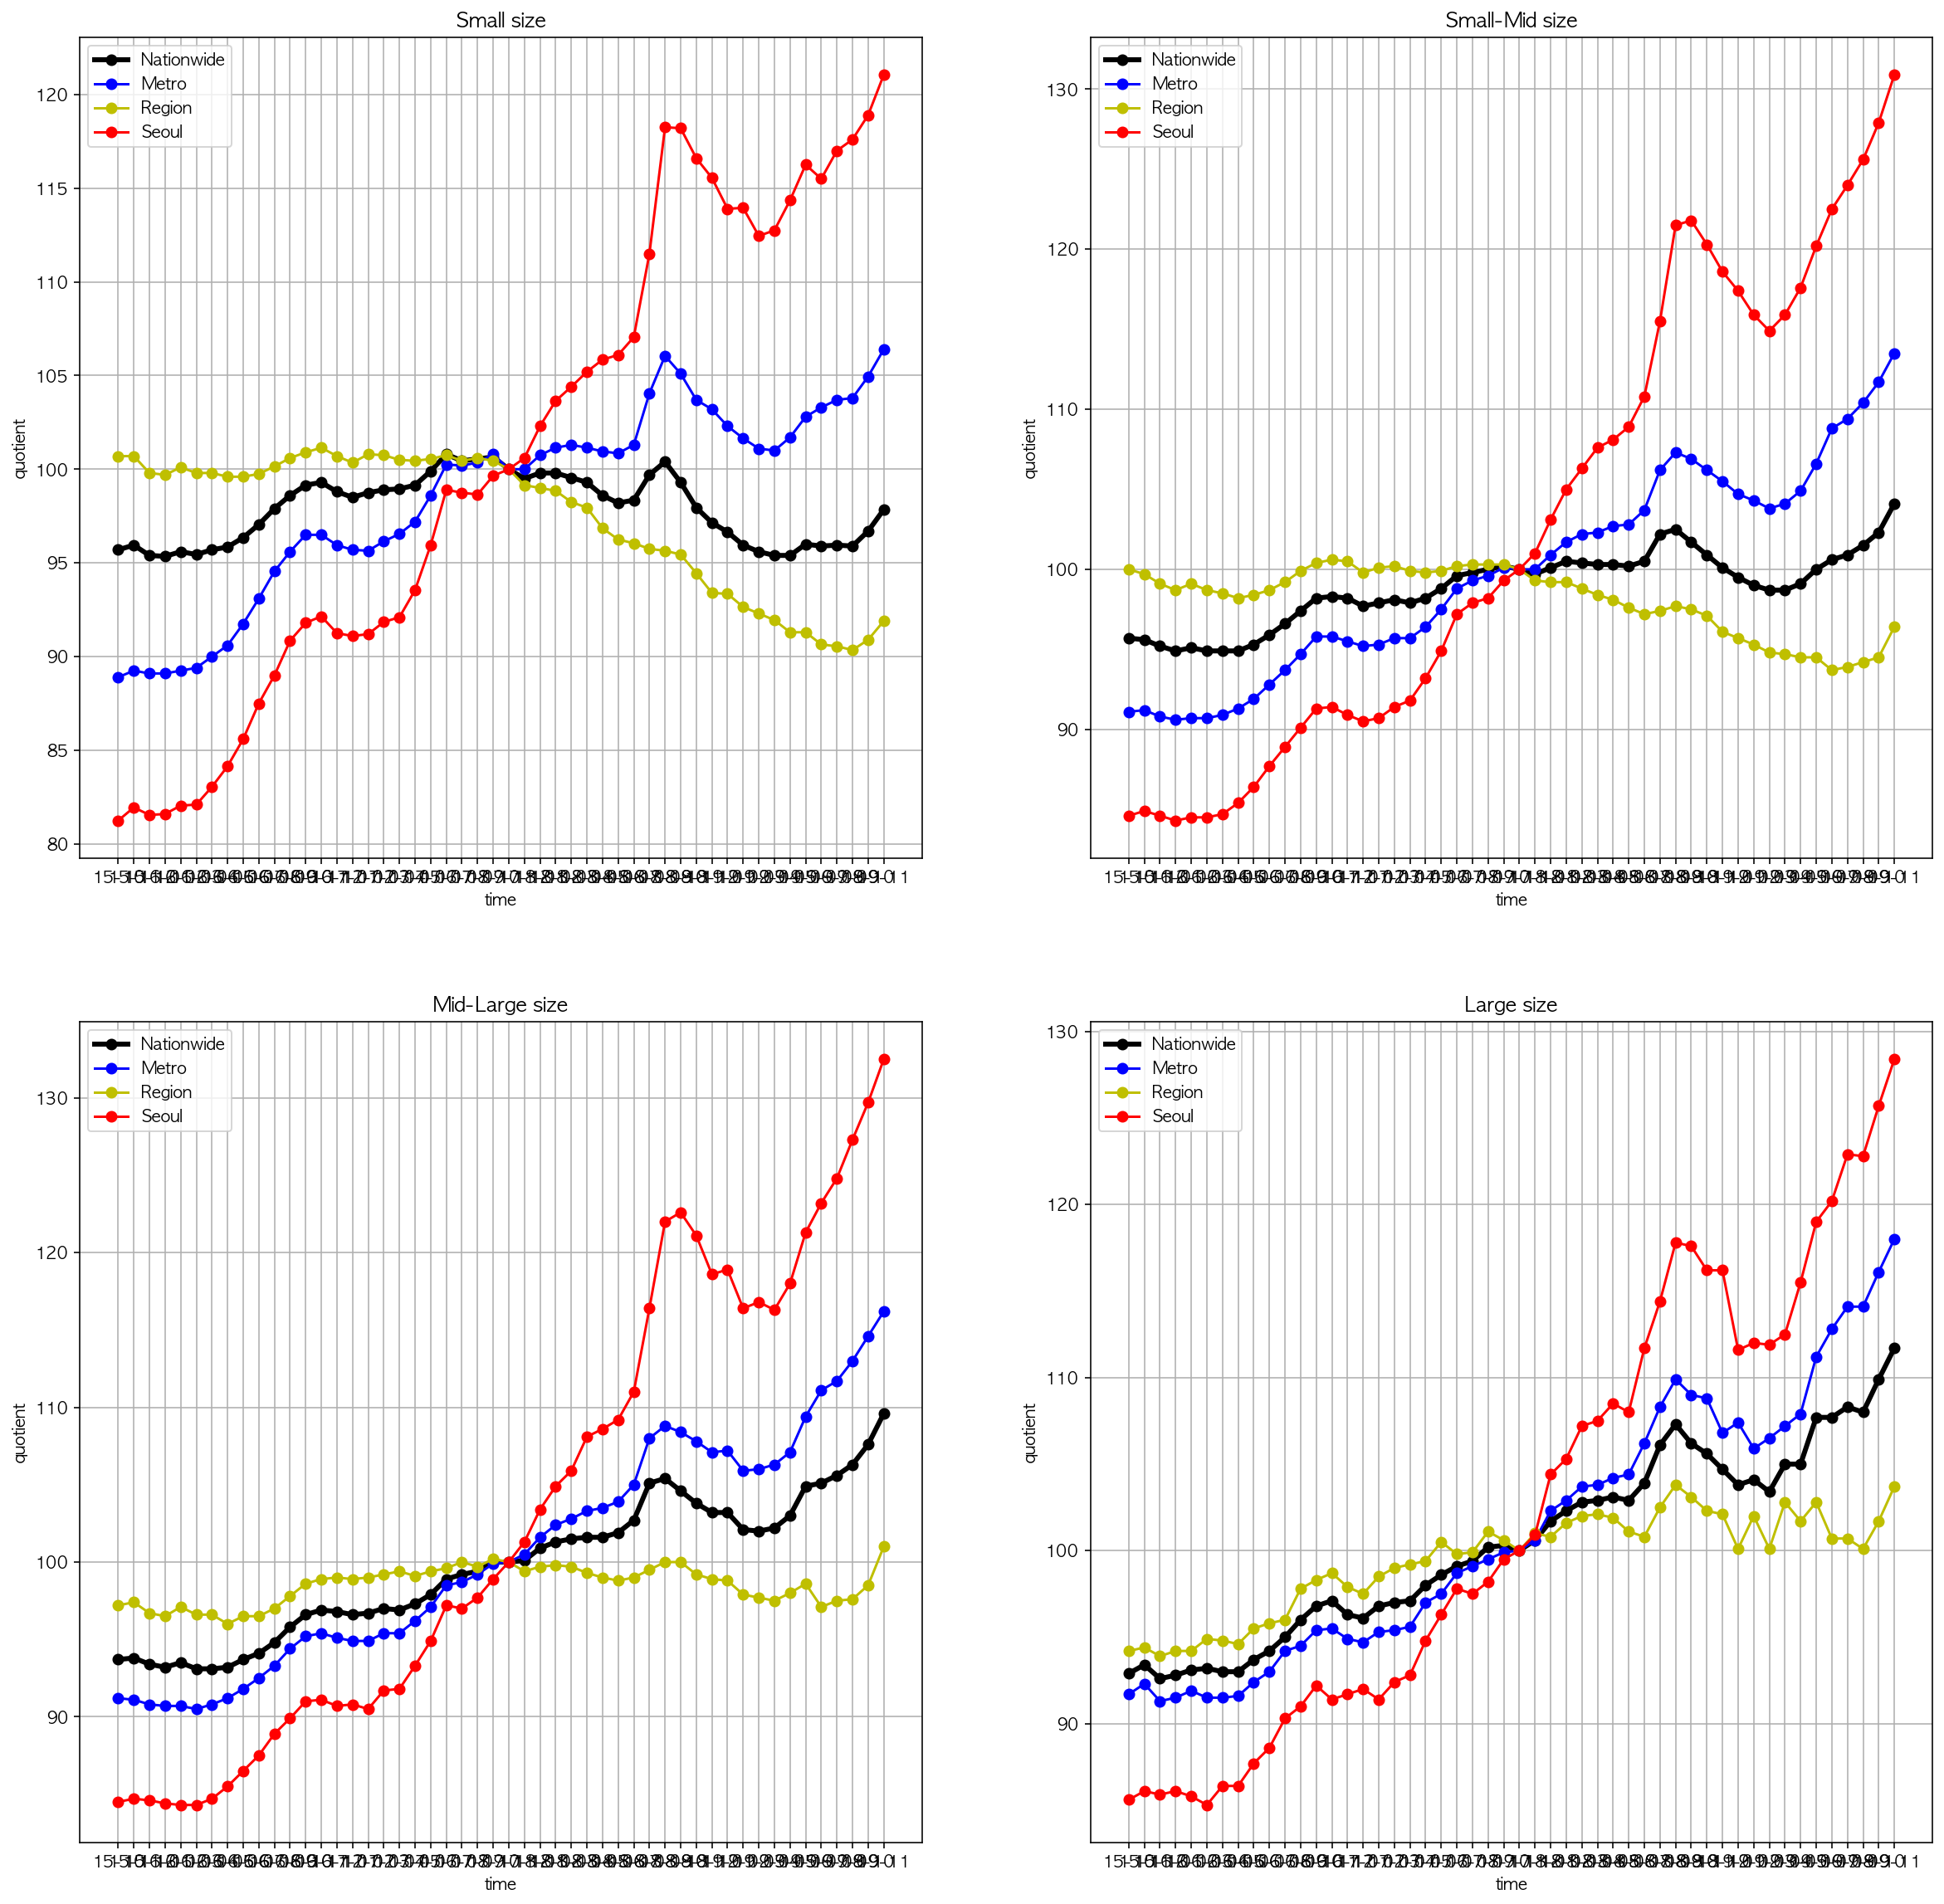

In [27]:
plt.figure(figsize=(20, 20))

plt.subplot(221)

plt.plot(df_small_real['Nationwide_s'], marker='o', c='k', linewidth=3, label='Nationwide')
plt.plot(df_small_real['Metro_s'], marker='o', c='b', label='Metro')
plt.plot(df_small_real['Region_s'], marker='o',c='y', label='Region')
plt.plot(df_small_real['Seoul_s'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.grid()
plt.title('Small size')
plt.legend()


plt.subplot(222)

plt.plot(df_smd_real['Nationwide_sm'], marker='o', c='k', linewidth=3, label='Nationwide')
plt.plot(df_smd_real['Metro_sm'], marker='o', c='b', label='Metro')
plt.plot(df_smd_real['Region_sm'], marker='o',c='y', label='Region')
plt.plot(df_smd_real['Seoul_sm'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.grid()
plt.title('Small-Mid size')
plt.legend()


plt.subplot(223)

plt.plot(df_midl_real['Nationwide_ml'], marker='o', c='k', linewidth=3, label='Nationwide')
plt.plot(df_midl_real['Metro_ml'], marker='o', c='b', label='Metro')
plt.plot(df_midl_real['Region_ml'], marker='o',c='y', label='Region')
plt.plot(df_midl_real['Seoul_ml'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.grid()
plt.title('Mid-Large size')
plt.legend()


plt.subplot(224)

plt.plot(df_large_real['Nationwide_l'], marker='o', c='k', linewidth=3, label='Nationwide')
plt.plot(df_large_real['Metro_l'], marker='o', c='b', label='Metro')
plt.plot(df_large_real['Region_l'], marker='o',c='y', label='Region')
plt.plot(df_large_real['Seoul_l'], marker='o', c='r', label='Seoul')
plt.xlabel('time')
plt.ylabel('quotient')
plt.grid()
plt.title('Large size')
plt.legend()

plt.show()

#### 분석 결과
- 기준: 2017년 11월
- 분류: 소형, 중소형, 중대형, 대형
    - 소형, 중소형
        - 지방: 17년 11월 이후 꾸준한 하락세, 과잉공급, 비인기, 중대형, 대형 인기

In [28]:
# 2-3. (규모 불문)지역별 지수 상승세 비교

nw_real_mean = (df_real['Nationwide_s'] + df_real['Nationwide_sm'] + df_real['Nationwide_ml'] + df_real['Nationwide_l']) / 4
me_real_mean = (df_real['Metro_s'] + df_real['Metro_sm'] + df_real['Metro_ml'] + df_real['Metro_l']) / 4
re_real_mean = (df_real['Region_s'] + df_real['Region_sm'] + df_real['Region_ml'] + df_real['Region_l']) / 4
se_real_mean = (df_real['Seoul_s'] + df_real['Seoul_sm'] + df_real['Seoul_ml'] + df_real['Seoul_l']) / 4

df_real_mean = pd.DataFrame([nw_real_mean, me_real_mean, re_real_mean, se_real_mean])

df_real_mean = df_real_mean.T
df_real_mean.columns = ['nationwide_r', 'metro_r', 'region_r', 'seoul_r']

In [29]:
df_real_mean

,nationwide_r,metro_r,region_r,seoul_r
timeline,,,,
15-10,94.5000,90.7250,98.0250,83.9875
15-11,94.6875,90.9625,98.0500,84.4125
15-12,94.1500,90.5000,97.3750,84.1625
16-01,94.0625,90.4750,97.2750,84.1000
16-02,94.3250,90.6375,97.6250,84.1625
16-03,94.1625,90.5250,97.5000,84.0500
16-04,94.1750,90.8000,97.4250,84.7125
16-05,94.2375,91.1750,97.1000,85.3625
16-06,94.7625,91.9625,97.5000,86.5500


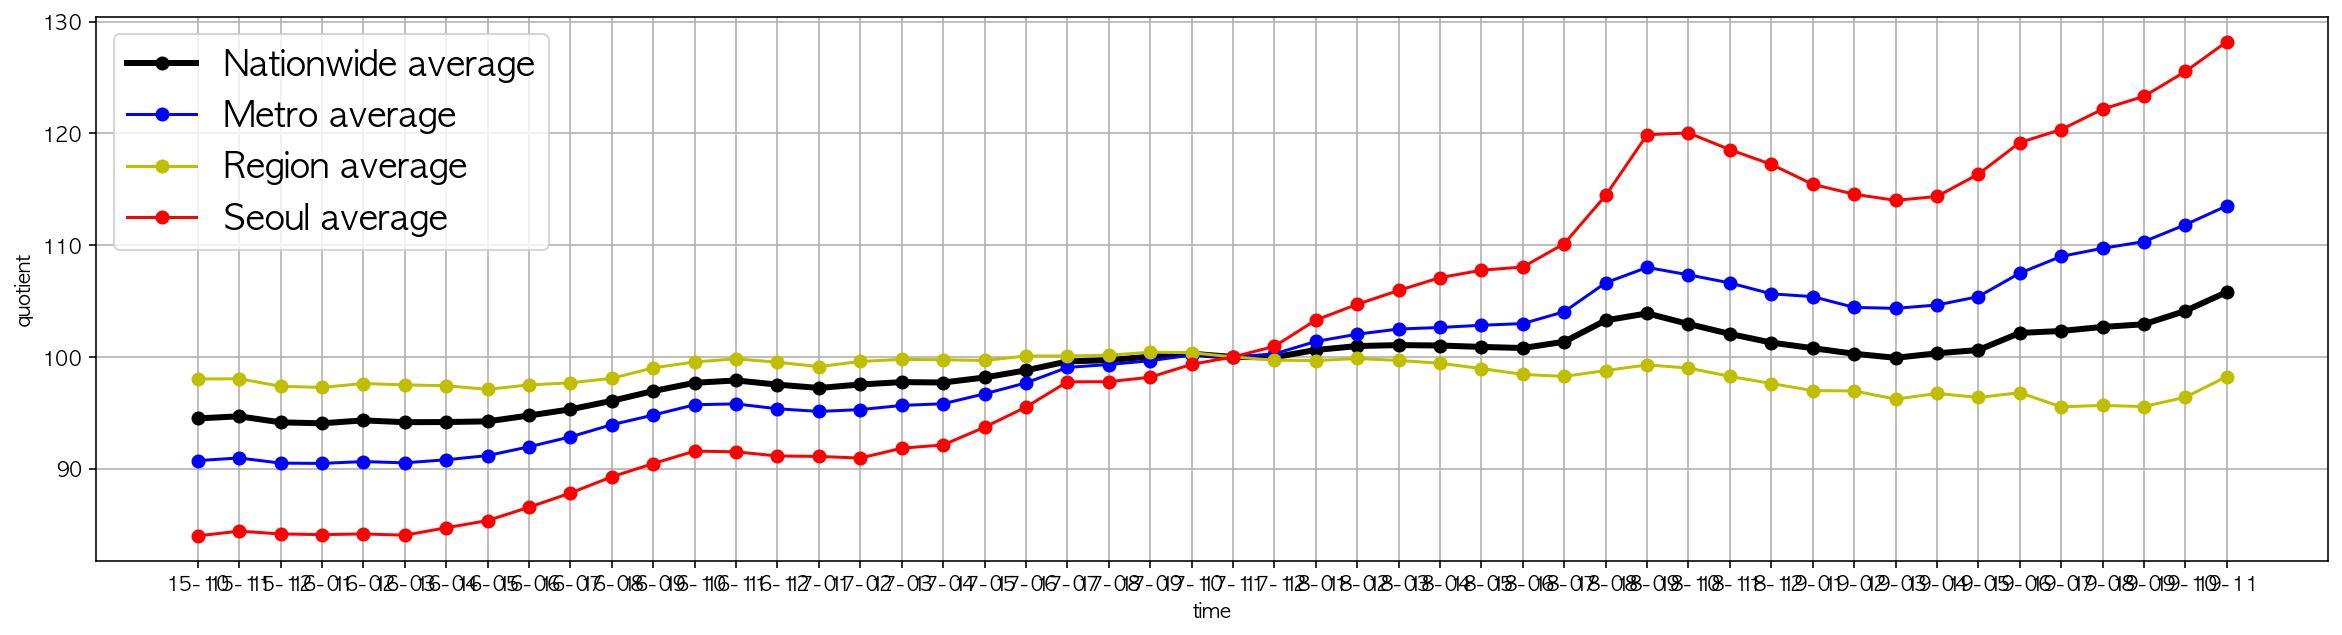

In [30]:
plt.figure(figsize=(20, 5))
plt.plot(df_real_mean['nationwide_r'], marker='o', c='k', linewidth=3, label='Nationwide average')
plt.plot(df_real_mean['metro_r'], marker='o', c='b', label='Metro average')
plt.plot(df_real_mean['region_r'], marker='o',c='y', label='Region average')
plt.plot(df_real_mean['seoul_r'], marker='o',c='r', label='Seoul average')
plt.xlabel('time')
plt.ylabel('quotient')
plt.grid()

plt.legend(loc=0, fontsize='xx-large')

plt.show()

#### 분석 결과

- 지방: 소형, 중소형의 영향으로 평균 아래인 것으로 파악 

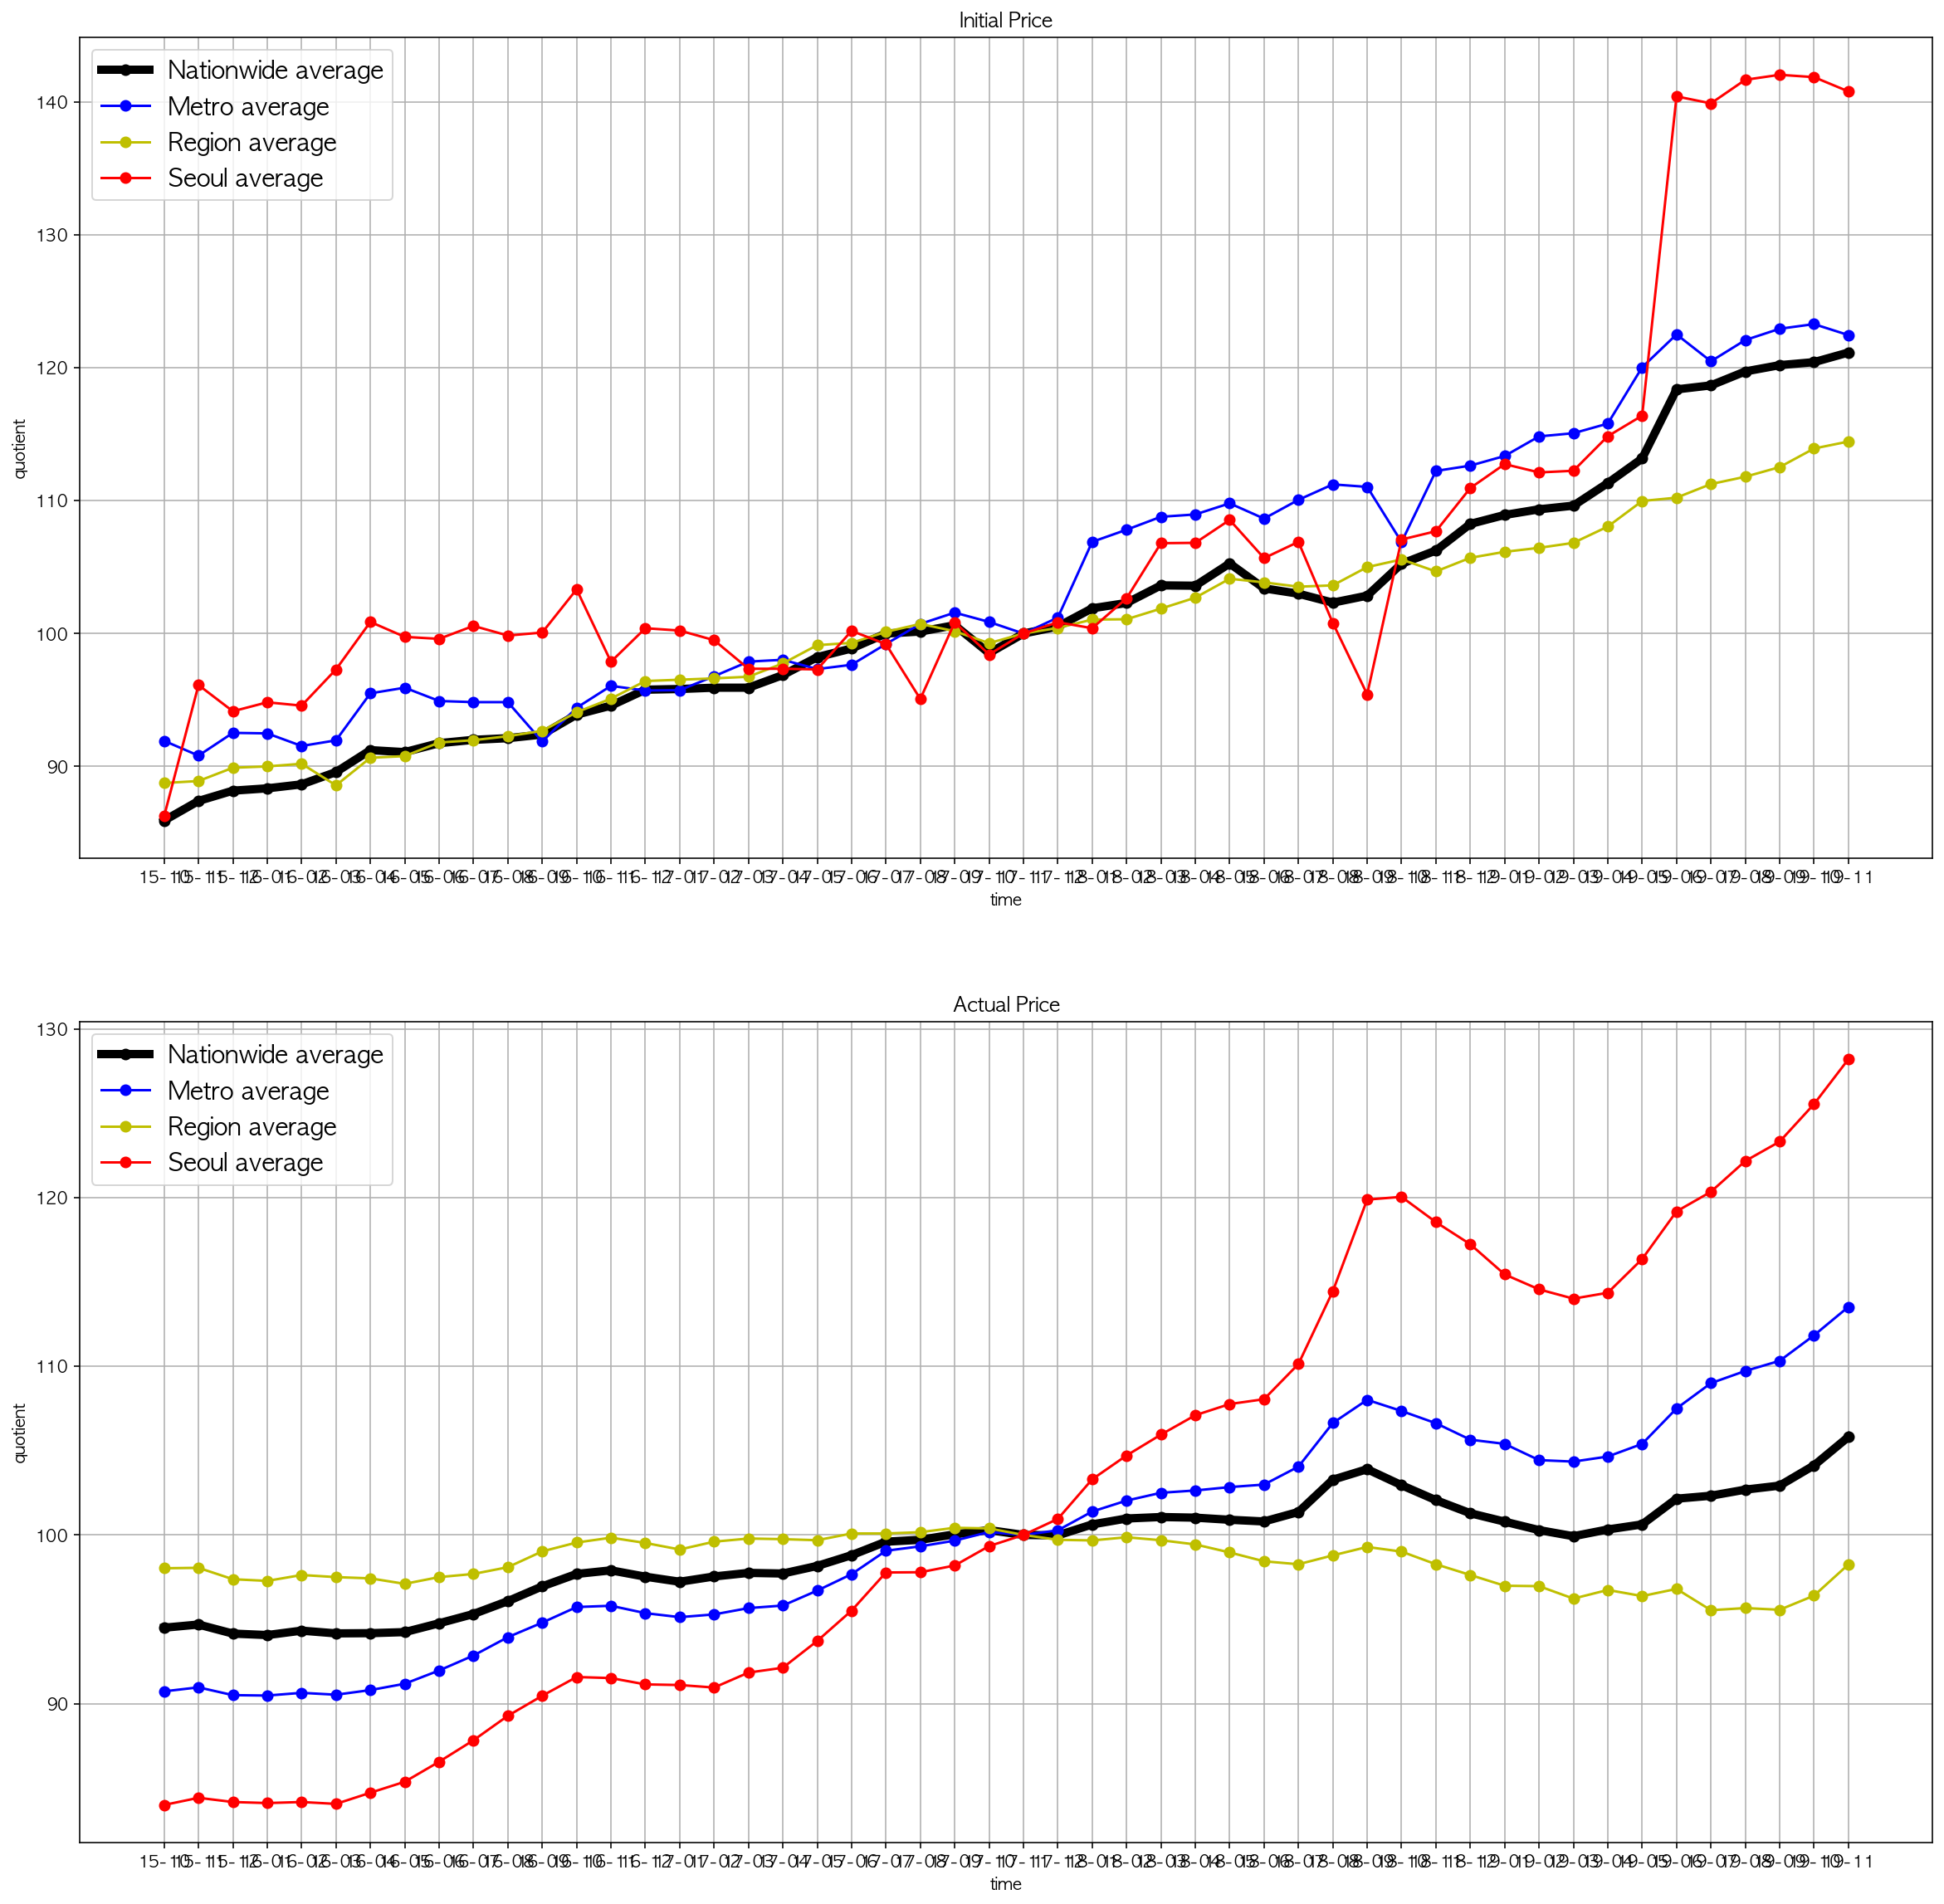

In [93]:
# 3. 분양가 지수, 거래가 지수 평균 비교


# 분양가

plt.figure(figsize=(20, 20))

plt.subplot(211)
plt.plot(df_init_mean['nationwide'], marker='o', c='k', linewidth=5, label='Nationwide average')
plt.plot(df_init_mean['metro'], marker='o', c='b', label='Metro average')
plt.plot(df_init_mean['region'], marker='o',c='y', label='Region average')
plt.plot(df_init_mean['seoul'], marker='o', c='r', label='Seoul average')
plt.xlabel('time')
plt.ylabel('quotient')
plt.grid()
plt.legend(fontsize='x-large')
plt.title("Initial Price")

plt.subplot(212)
plt.plot(df_real_mean['nationwide_r'], marker='o', c='k', linewidth=5, label='Nationwide average')
plt.plot(df_real_mean['metro_r'], marker='o', c='b', label='Metro average')
plt.plot(df_real_mean['region_r'], marker='o',c='y', label='Region average')
plt.plot(df_real_mean['seoul_r'], marker='o',c='r', label='Seoul average')
plt.xlabel('time')
plt.ylabel('quotient')
plt.grid()
plt.legend(fontsize='x-large')
plt.title("Actual Price")


plt.show()


#### 분석 결과

- 분양가 상승폭: 서울 >= 경기 > 지방 순
- 거래가 상승폭: 서울 > 경기 > 지방 순
- 지방의 경우, 분양가/거래가 모두 전국 평균에 수렴하거나 미달되는 경향

#### 특이사항

- 서울 지역의 평균 분양가 편향을 감안해야 함

### 가설 검증: 분양가와 거래가의 상관 관계

In [32]:
nw_coe = np.corrcoef(df_init_mean['nationwide'], df_real_mean['nationwide_r'])
me_coe = np.corrcoef(df_init_mean['metro'], df_real_mean['metro_r'])
lo_coe = np.corrcoef(df_init_mean['region'], df_real_mean['region_r'])
se_coe = np.corrcoef(df_init_mean['seoul'], df_real_mean['seoul_r'])

In [33]:
nw_coe, me_coe, lo_coe, se_coe

(array([[1.        , 0.87685455],
        [0.87685455, 1.        ]]), array([[1.        , 0.94889456],
        [0.94889456, 1.        ]]), array([[ 1.        , -0.30339843],
        [-0.30339843,  1.        ]]), array([[1.        , 0.77373351],
        [0.77373351, 1.        ]]))

In [87]:
#분양가-거래가 상관관계: 피어슨 상관계수 도출
# 서울, 수도권, 지방, 전국 순

se_coe[0, 1], me_coe[0, 1], lo_coe[0, 1], nw_coe[0, 1]

(0.773733508809496, 0.948894562068937, -0.3033984292324676, 0.876854550228283)

#### 분석 결과

- 상관계수의 크기는 수도권 > 서울 > 지방 순
- 지방의 경우, 역의 상관관계 발생
- 전체 평균에 근거할 경우, 비교적 상관관계가 높다고 판단 가능(상관계수: 약 0.87)

In [35]:
# 4. 실제 가격 확인

In [104]:
df_trend = pd.read_csv("transposed/price_trend_t.csv", encoding = "utf-8")

In [105]:
df_trend.set_index('timeline', inplace=True)

df_trend

,서울_강남3구,서울_마용성,서울_서남부,서울_동북부,서울_서북부,인천,부산,대구,광주,대전,...,경기_남부,강원도,충북,충남,전북,전남,경북,경남,제주,전국
timeline,,,,,,,,,,,,,,,,,,,,,
17-01,822.6,594.9,457.0,430.1,467.7,232.3,244.2,248.7,186.2,193.8,...,280.3,137.9,159.2,147.6,131.1,122.1,149.3,187.2,300.8,281.9
17-02,823.8,596.5,457.8,430.7,469.2,232.6,245.7,248.5,187.7,194.1,...,280.6,138.2,159.2,147.7,131.4,122.7,149.1,187.1,302.2,282.4
17-03,827.2,601.4,459.1,431.7,472.6,233.0,247.3,248.4,187.9,194.6,...,281.1,138.5,159.1,147.5,131.5,123.2,148.9,187.0,303.1,283.3
17-04,831.1,604.0,461.7,433.1,473.9,233.2,249.0,248.5,188.1,194.9,...,281.6,139.0,159.2,147.5,131.7,123.9,148.8,186.9,302.3,284.1
17-05,841.2,609.8,464.2,436.9,477.0,233.7,250.6,248.6,188.7,195.1,...,282.3,139.2,159.1,147.4,131.9,124.5,148.5,187.4,305.4,285.7
17-06,860.9,617.3,469.1,442.5,480.6,234.7,252.1,249.2,188.9,195.2,...,283.8,139.4,159.2,147.5,132.0,125.0,148.9,187.4,305.5,288.3
17-07,873.0,624.3,474.8,445.1,484.6,235.4,253.2,249.7,189.6,195.3,...,285.5,140.1,159.1,147.4,132.2,125.8,149.1,186.9,305.9,290.5
17-08,896.8,636.5,485.2,452.6,489.6,237.1,254.6,252.2,190.3,195.8,...,288.0,140.8,158.4,147.7,132.4,126.1,148.9,186.5,306.9,293.9
17-09,899.1,641.7,488.7,451.4,491.4,237.8,255.8,254.9,191.0,196.2,...,289.1,141.5,157.9,147.4,132.5,127.4,148.6,185.8,308.6,294.8


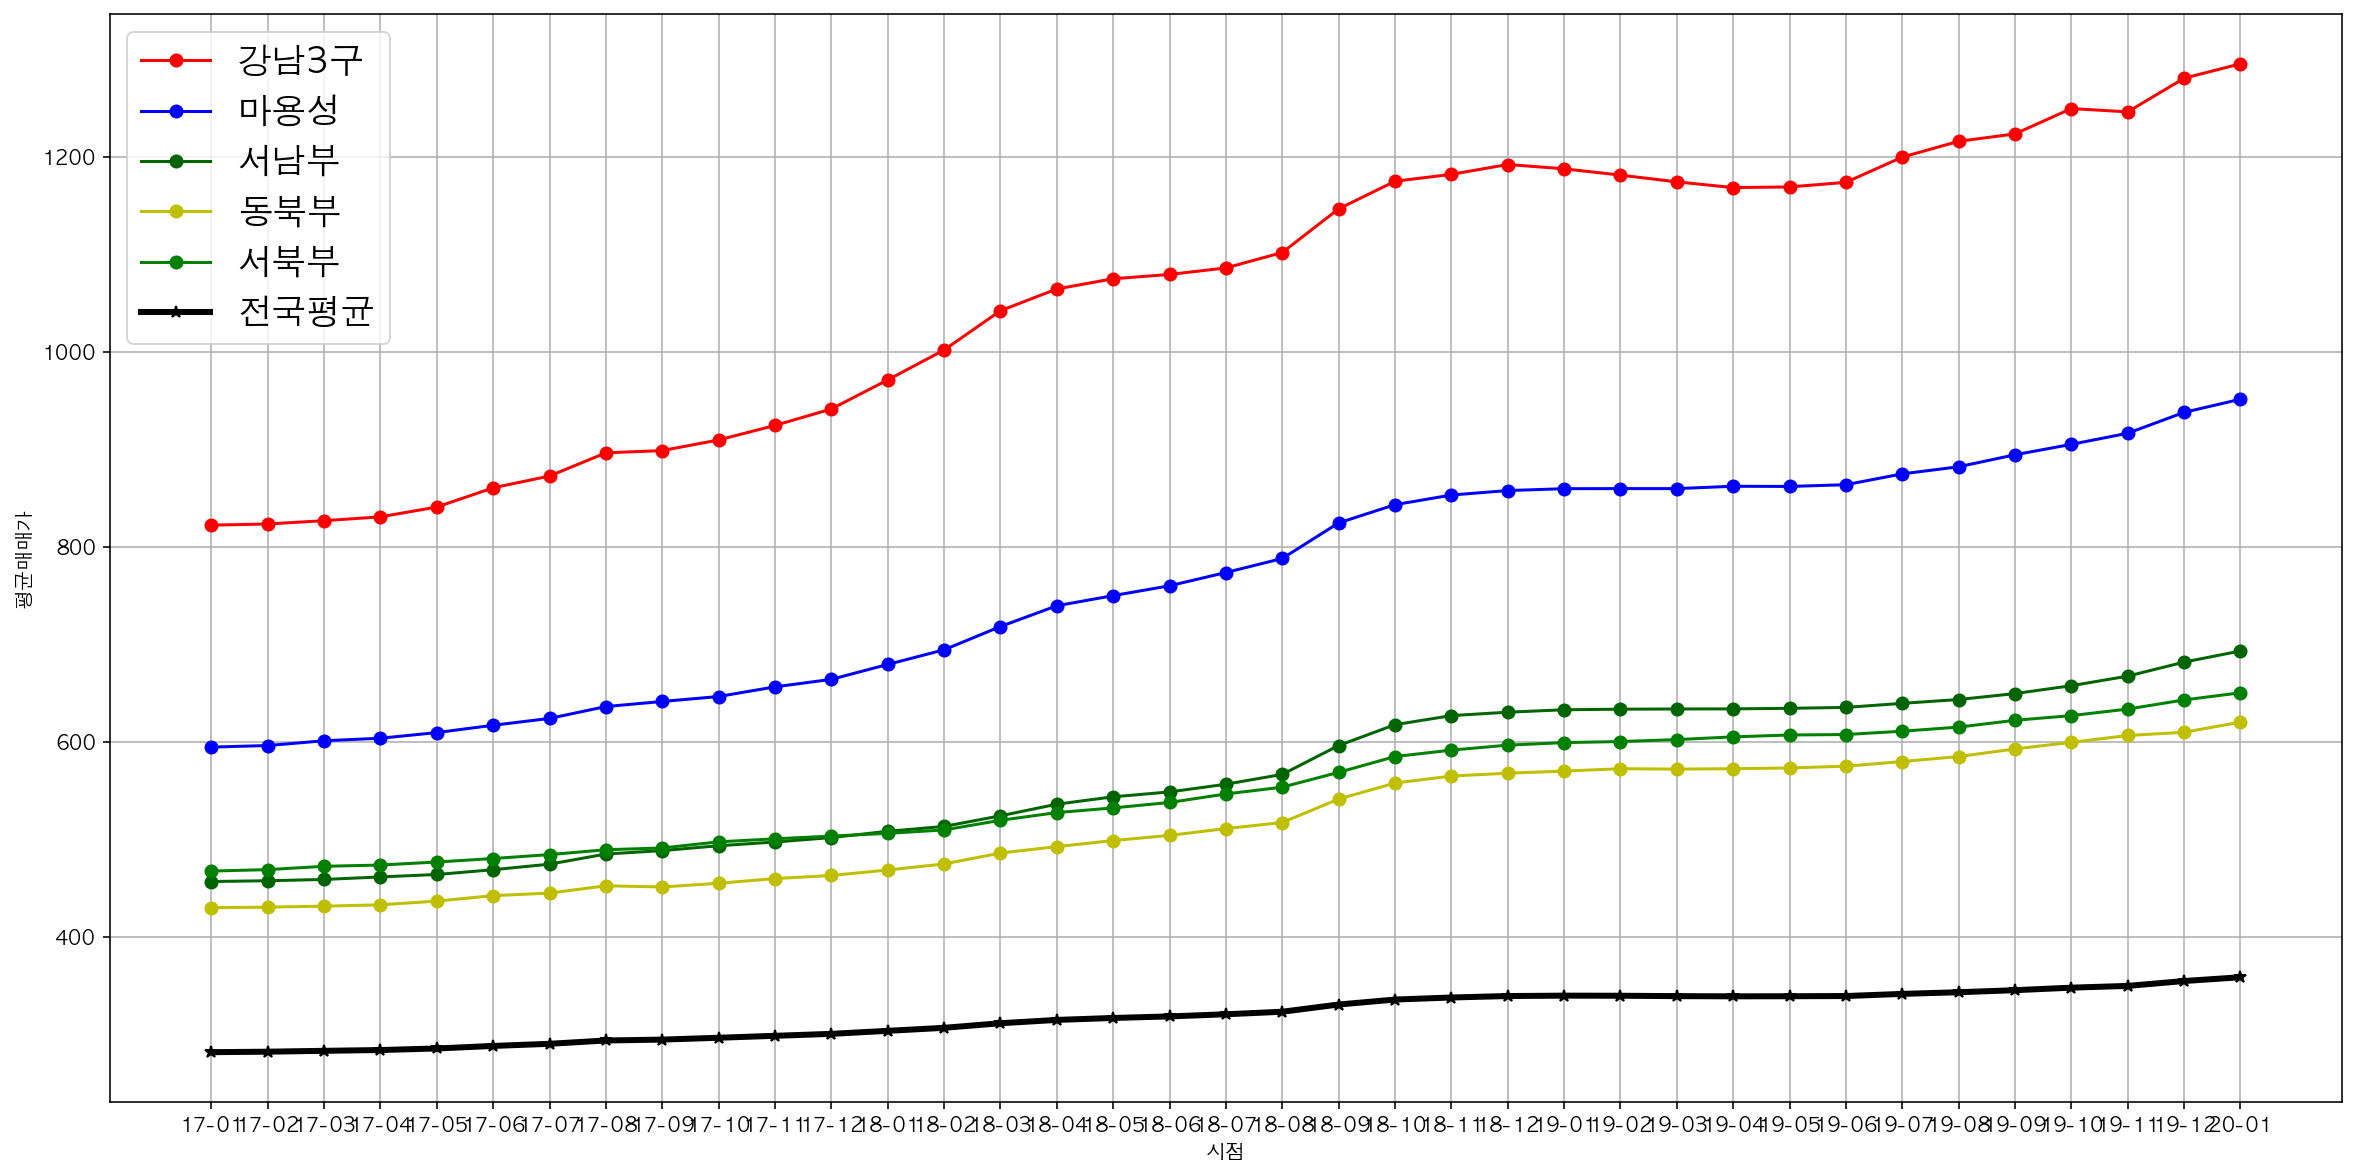

In [101]:
# 서울 평균 시세 비교

plt.figure(figsize=(20, 10))
plt.plot(df_trend['서울_강남3구'], marker='o', c='r', label='강남3구')
plt.plot(df_trend['서울_마용성'], marker='o', c='b', label='마용성')
plt.plot(df_trend['서울_서남부'], marker='o',c='darkgreen', label='서남부')
plt.plot(df_trend['서울_동북부'], marker='o',c='y', label='동북부')
plt.plot(df_trend['서울_서북부'], marker='o',c='g', label='서북부')
plt.plot(df_trend['전국'], marker='*',c='k', linewidth=3, label='전국평균')

plt.xlabel('시점')
plt.ylabel('평균매매가')
plt.grid()

plt.legend(loc=0, fontsize='xx-large')

plt.show()

#### 분석 결과

- 강남 3구: 전국 평균의 3배 이상
- 마용성: 전국평균의 2배 이상

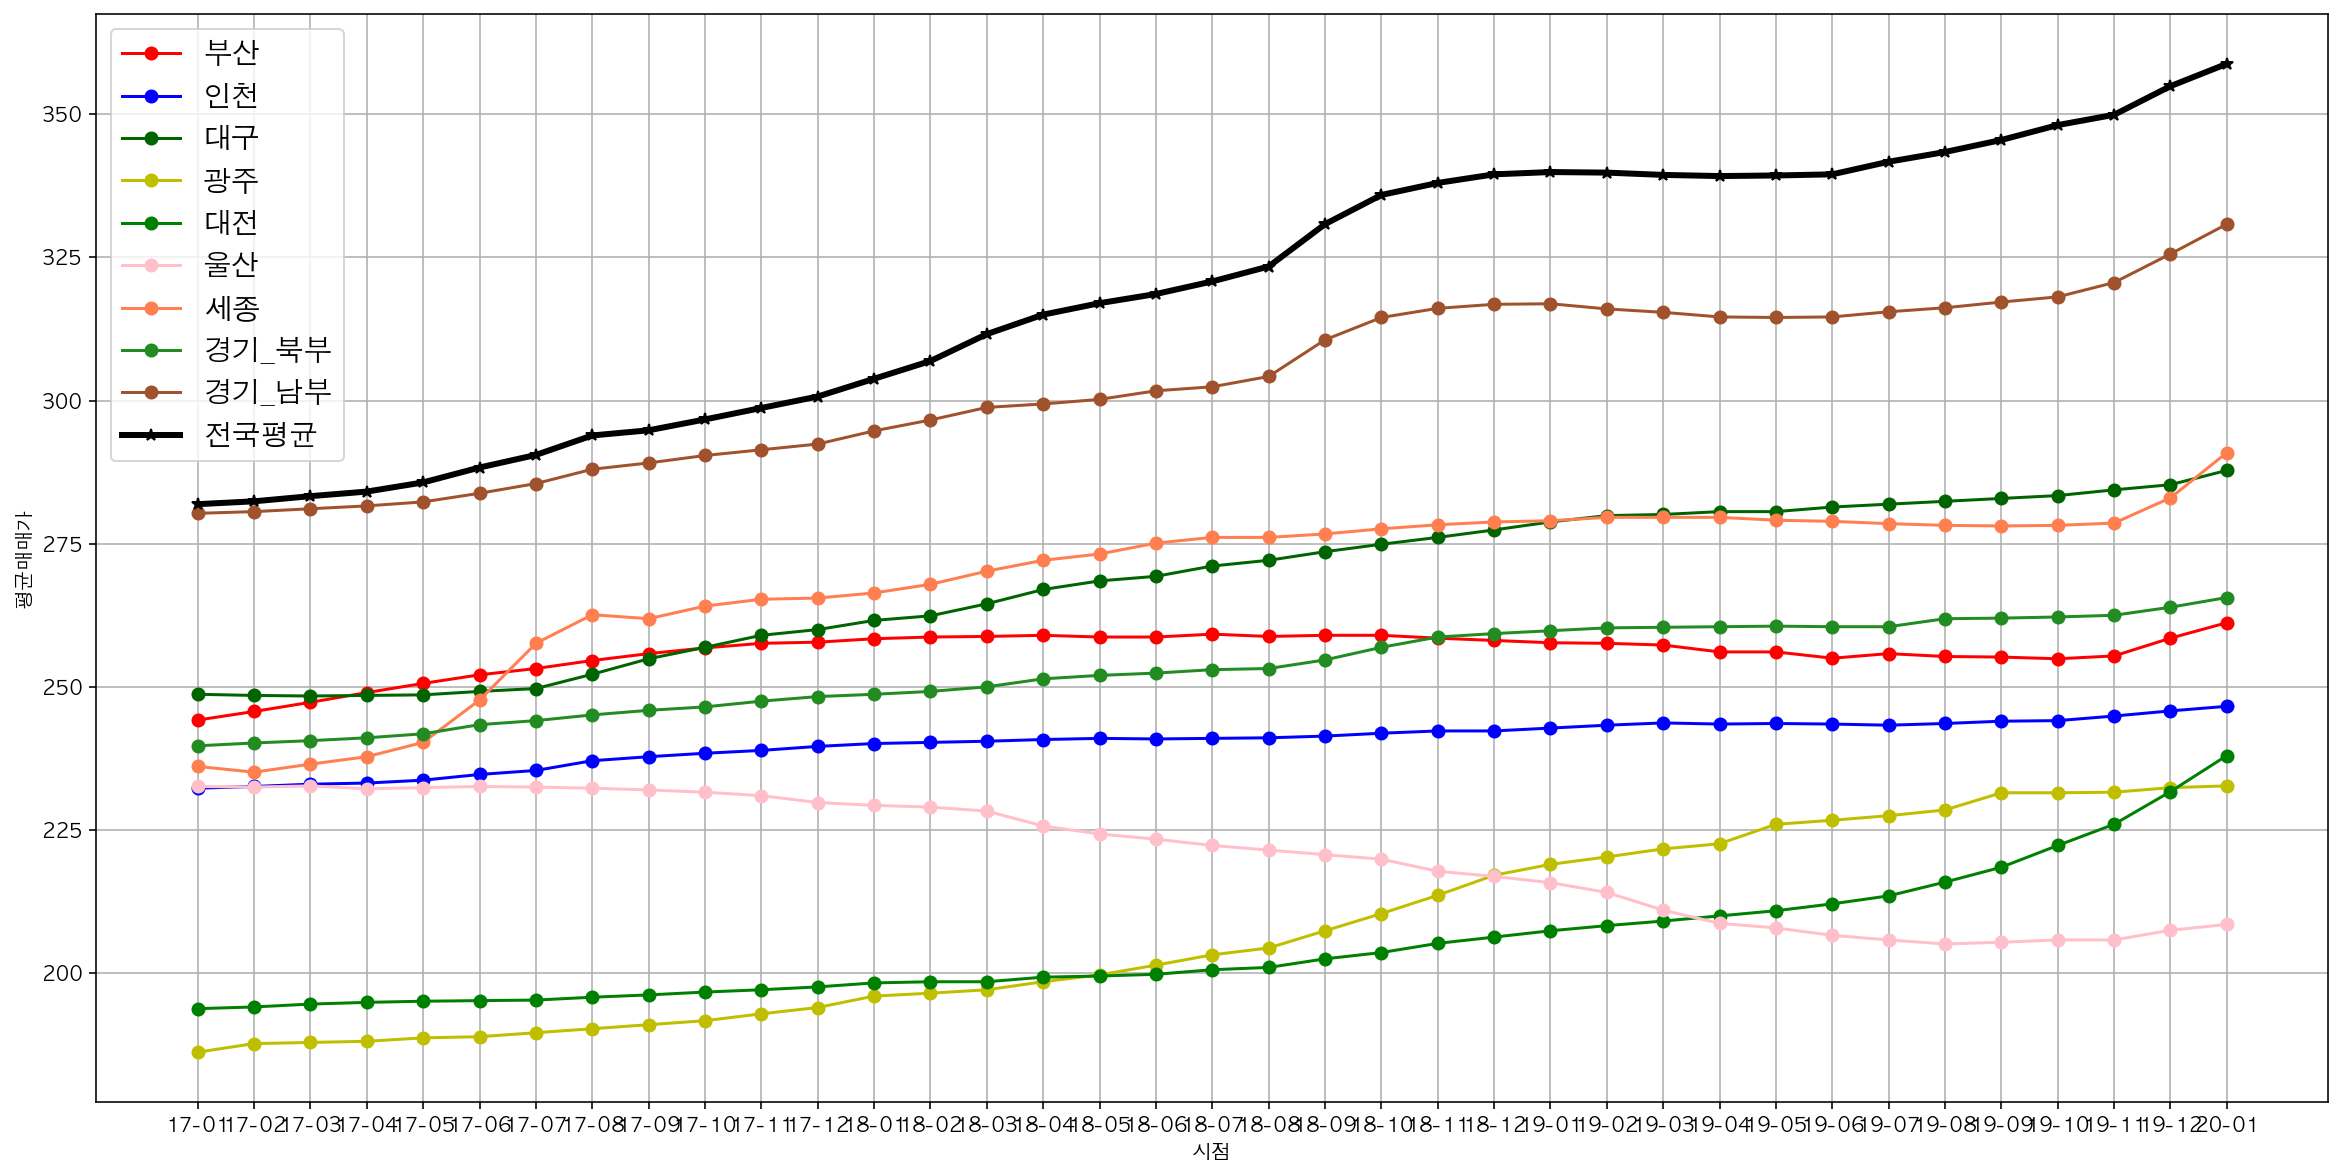

In [102]:
# 광역시 + 경기도 평균 시세 비교

plt.figure(figsize=(20, 10))
plt.plot(df_trend['부산'], marker='o', c='r', label='부산')
plt.plot(df_trend['인천'], marker='o', c='b', label='인천')
plt.plot(df_trend['대구'], marker='o',c='darkgreen', label='대구')
plt.plot(df_trend['광주'], marker='o',c='y', label='광주')
plt.plot(df_trend['대전'], marker='o',c='g', label='대전')
plt.plot(df_trend['울산'], marker='o',c='pink', label='울산')
plt.plot(df_trend['세종'], marker='o',c='coral', label='세종')
plt.plot(df_trend['경기_북부'], marker='o',c='forestgreen', label='경기_북부')
plt.plot(df_trend['경기_남부'], marker='o',c='sienna', label='경기_남부')
plt.plot(df_trend['전국'], marker='*',c='k', linewidth=3, label='전국평균')

plt.xlabel('시점')
plt.ylabel('평균매매가')
plt.grid()

plt.legend(fontsize='x-large')

plt.show()

#### 분석 결과

- 서울의 영향으로 전국 평균 아래 분포

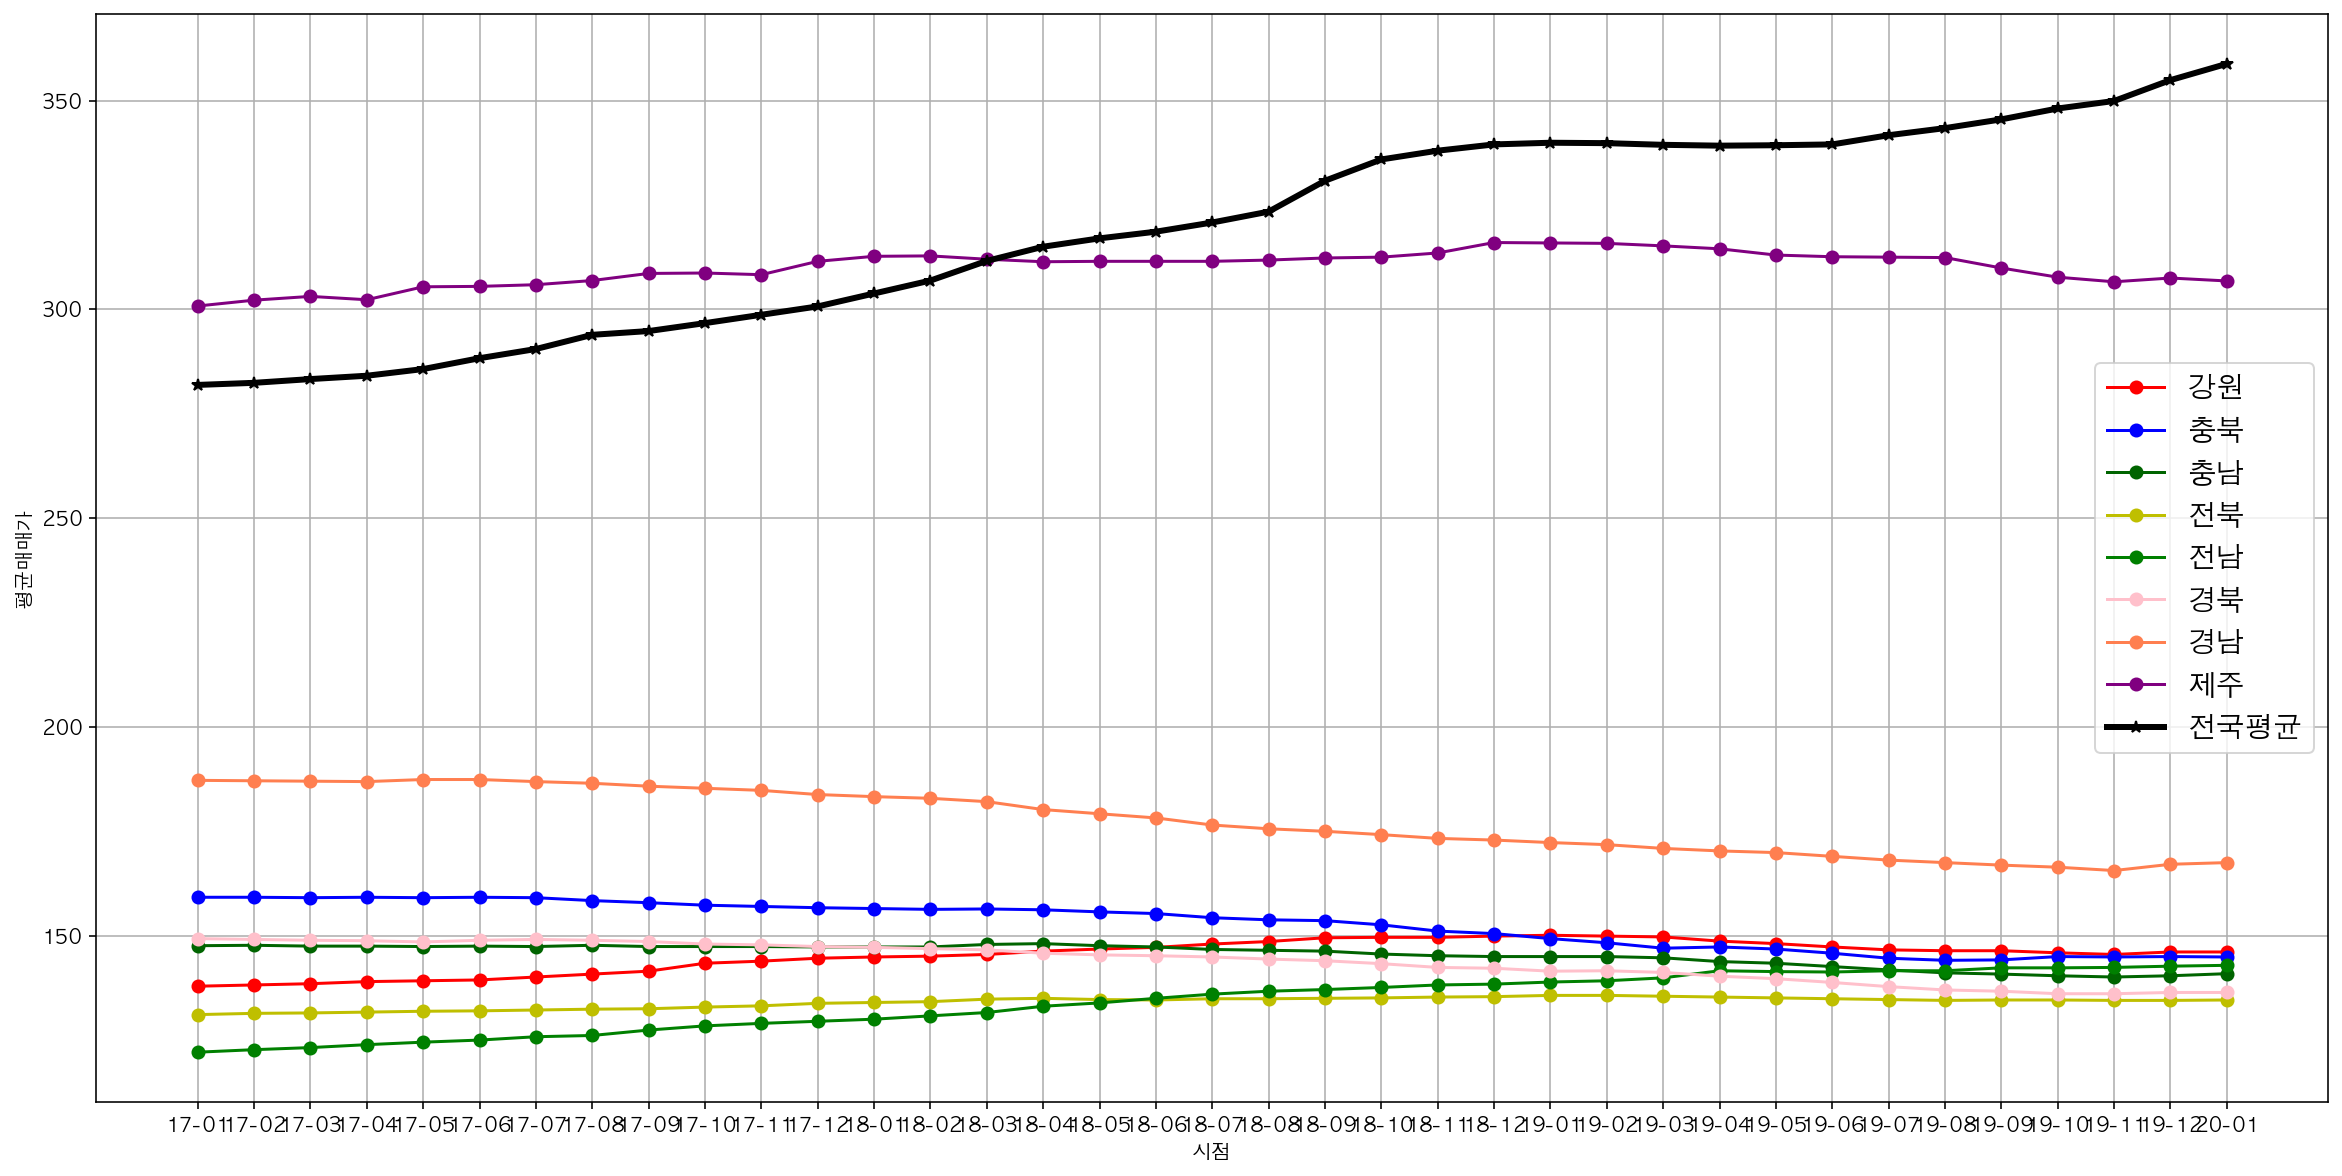

In [103]:
# 지방 평균 시세 비교

plt.figure(figsize=(20, 10))
plt.plot(df_trend['강원도'], marker='o', c='r', label='강원')
plt.plot(df_trend['충북'], marker='o', c='b', label='충북')
plt.plot(df_trend['충남'], marker='o',c='darkgreen', label='충남')
plt.plot(df_trend['전북'], marker='o',c='y', label='전북')
plt.plot(df_trend['전남'], marker='o',c='g', label='전남')
plt.plot(df_trend['경북'], marker='o',c='pink', label='경북')
plt.plot(df_trend['경남'], marker='o',c='coral', label='경남')
plt.plot(df_trend['제주'], marker='o',c='purple', label='제주')
plt.plot(df_trend['전국'], marker='*',c='k', linewidth=3, label='전국평균')
plt.xlabel('시점')
plt.ylabel('평균매매가')
plt.grid()

plt.legend(fontsize='x-large')

plt.show()

#### 분석 결과

- 제주: 다른 지방과 비교하여 상대적으로 높음 
    = 무비자로 외국인의 영향을 받고 있는 것으로 파악
    
- 부동산은 산업과 밀접한 영향이 있는 것으로 파악

In [72]:
# 상승률 비교

fin_price = df_trend.loc['20-01']
st_price = df_trend.loc['17-01']

aug = (fin_price - st_price) / st_price * 100

In [85]:
aug = aug.astype(int)
aug

서울_강남3구    57
서울_마용성     59
서울_서남부     51
서울_동북부     44
서울_서북부     39
인천          6
부산          6
대구         15
광주         24
대전         22
울산        -10
세종         23
경기_북부      10
경기_남부      18
강원도         5
충북         -8
충남         -4
전북          2
전남         17
경북         -8
경남        -10
제주          1
전국         27
dtype: int64

### 분석 결과 종합

- 아파트 분양가와 거래 가격과는 깊은 관계가 있음
    - 인플레이션을 고려할 경우 자연스러운 결과로, 최근 수년간은 아파트 시장이 하강 국면이 아님을 반증

- 지역별 편차가 매우 큼
    - 서울 - 상승세: 2017년 11월을 기점으로 거래가의 상승폭이 두드러짐
        - 당시 미리 예고된 정부의 시장 조정에 앞서 선 매물을 확보하려는 움직임
    - 수도권 - 보합: 분양가와 거래가가 가장 유사한 흐름을 보임
    - 지방 - 하락세: 일반적인 예상과는 반대의 결과가 도출
        - 거래가의 상승폭이 분양가의 상승폭에 미치지 못한 상황으로, 신규 매매를 할 경우 시세 상승을 기대하기 어려움

## 가설 결론

### 가설 1. 분양가격과 실제 아파트의 가격은 깊은 관계가 있을 것이다.

#### -> 그렇다. 서울, 수도권에 한정해서 보합/상승세가 확인되었다.

### 가설 2. 구매하려면 지방보다는 서울이 나을 것이다.

#### -> 그렇다. 지방은 절대치/상대치 모두 전국 평균에 미달하여, 투자가치가 현저히 떨어진다,

### 가설 3. 구매하려면 대형보다는 소형이 나을 것이다.

#### -> 꼭 그렇지는 않다. 실거래 여부, 예상 보유 기간 등을 추가적으로 고려해야 함.
    - 거래가는 규모에 상관 없이 일정하게 상승
    - 분양가는 중대형을 제외한 나머지 규모가 균일하게 상승

### 가설 4. 아파트는 아직 타 투자수단 대비 매력적일 것이다.

#### -> 서울 지역의 매물이라면 매우 매력적이나, 속단은 금물.
    - 최근 3년간 세부 지역을 막론하고 서울의 평균 시세 상승률은 40% 이상
    - 실 가치 반영보다는 거품에 가까운 상승세로, 향후에도 현재 기조를 유지하기 매우 어려운 대외 상황